# 9-1 순차 데이터와 순환 신경망

###시계열 데이터
- 일정 시간 간격으로 배치된 데이터

### 순차 데이터
- 시계열 데이터를 포함하여 샘플에 순서가 있는 데이터
- ex) 텍스트
- 타임 스텝(time step) : 모델에서 순차 데이터를 처리하는 각 단계

### 순환 신경망
- 뉴런의 출력이 순환되는 신경망
- 층이나 뉴런을 셀(cell)이라 부름, 셀의 출력을 은닉 상태(hidden state)라 부름
- 순환 신경망의 셀에서는 활성화 함수로 하이퍼볼릭 탄젠트(hyperbolic tangent)를 주로 사용


In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top = 20, num_words = 100)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [3]:
print(x_train_all[0])
# 2는 사전에 없는 단어

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [4]:
# 2 제외하기
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]
print(x_train_all[0]) 

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
# 어휘 사전 내려받기
word_to_index = imdb.get_word_index()
word_to_index['movie']

1641221/1641221 [==============================] - 0s 0us/step


17

In [6]:
# 정수를 영단어로 변환하기
index_to_word = {word_to_index[k] : k for k in word_to_index}

# 3이상부터 영단어를 의미하므로 3을 뺀 값을 사용
for w in x_train_all[0]:
  print(index_to_word[w - 3], end = ' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [8]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [9]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [10]:
# 샘플의 길이 맞추기
from tensorflow.keras.preprocessing import sequence

# 길이가 짧으면 왼쪽에 0을 채움
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen = maxlen)

In [11]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [12]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [13]:
# 원-인 핫코딩
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [14]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [15]:
print(x_train_onehot.nbytes)

800000000


In [16]:
# 신경망 클래스 구현
import tensorflow as tf

class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     
        self.batch_size = batch_size 
        self.w1h = None            
        self.w1x = None            
        self.b1 = None             
        self.w2 = None             
        self.b2 = None             
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           
        self.val_losses = []       
        self.lr = learning_rate    

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   
        # 배치 차원과 타임 스텝 차원을 바꿈
        seq = np.swapaxes(x, 0, 1)
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용
            self.h.append(h)                   
            z2 = np.dot(h, self.w2) + self.b2  
        return z2

    def backprop(self, x, err):
        m = len(x)    
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿈
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m
    
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))  
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()
        self.w1x = glorot_init((n_features, self.n_cells)).numpy()
        self.b1 = np.zeros(self.n_cells)                          
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()  
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                a = np.clip(a, 1e-10, 1-1e-10)
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            self.update_val_loss(x_val, y_val)

    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size 
        if length % self.batch_size:
            bins += 1     # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) 
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]
            
    def training(self, x, y):
        m = len(x)                
        z = self.forpass(x)       
        a = self.sigmoid(z)      
        err = -(y - a)           
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)         
        return z > 0                
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            
        a = self.sigmoid(z)                
        a = np.clip(a, 1e-10, 1-1e-10)  
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [17]:
# 모델 훈련
rn = RecurrentNetwork(n_cells = 32, batch_size = 32, learning_rate = 0.01)

rn.fit(x_train_onehot, y_train, epochs = 20, x_val = x_val_onehot, y_val = y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

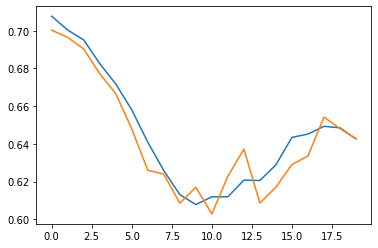

In [18]:
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [19]:
rn.score(x_val_onehot, y_val)

0.6188

# 9-3 텐서플로로 순환 신경만 만들기

SimpleRNN 클래사 사용

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [21]:
# 모델 만들기

model = Sequential()

model.add(SimpleRNN(32, input_shape = (100, 100)))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 모델 컴파일하고 훈련
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs = 20, batch_size = 32, validation_data = (x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 13s 20ms/step - loss: 0.7063 - accuracy: 0.4988 - val_loss: 0.6987 - val_accuracy: 0.5020
Epoch 2/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6947 - accuracy: 0.5158 - val_loss: 0.6957 - val_accuracy: 0.5050
Epoch 3/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6913 - accuracy: 0.5227 - val_loss: 0.6926 - val_accuracy: 0.5238
Epoch 4/20
625/625 [==============================] - 13s 20ms/step - loss: 0.6884 - accuracy: 0.5379 - val_loss: 0.6947 - val_accuracy: 0.5190
Epoch 5/20
625/625 [==============================] - 13s 21ms/step - loss: 0.6848 - accuracy: 0.5520 - val_loss: 0.6895 - val_accuracy: 0.5412
Epoch 6/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6714 - accuracy: 0.5863 - val_loss: 0.6571 - val_accuracy: 0.6084
Epoch 7/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6445 - accuracy: 0.6283 - val_loss: 0.6299 - val_accuracy:

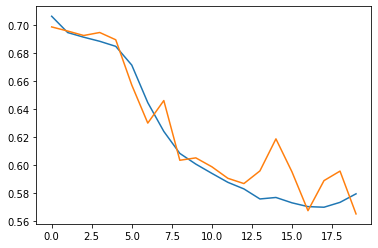

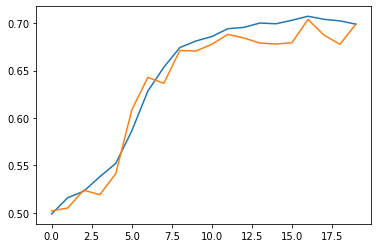

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [24]:
# 정확도 평가
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose = 0)
print(accuracy)

0.6991999745368958


### 원-인 핫코딩

- 원-인 핫코딩을 사용하면 입력 데이터 크기와 사용할 수 있는 영단어의 수가 제한된다는 문제가 있음
- '단어 사이에는 관련이 전혀 없다'는 가정이 전제되어야 함

### 단어 임베딩(word embedding)

- 단어를 고정된 길이의 실수 벡터로 임베딩
- 모델을 훈련하면서 같이 훈련되므로 훈련이 진행될수록 단어의 연관 관계를 더 정확하게 찾을 수 있음

In [25]:
from tensorflow.keras.layers import Embedding
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top = 20, num_words = 1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [26]:
maxlne = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen = maxlen)

In [27]:
# 모델 만들기

model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation = 'sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 모델 컴파일하고 훈련
model_ebd.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs = 10, batch_size = 32, validation_data = (x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 13s 20ms/step - loss: 0.5561 - accuracy: 0.7073 - val_loss: 0.4650 - val_accuracy: 0.7878
Epoch 2/10
625/625 [==============================] - 12s 20ms/step - loss: 0.4153 - accuracy: 0.8197 - val_loss: 0.4296 - val_accuracy: 0.8084
Epoch 3/10
625/625 [==============================] - 13s 22ms/step - loss: 0.3629 - accuracy: 0.8464 - val_loss: 0.4292 - val_accuracy: 0.8080
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3306 - accuracy: 0.8650 - val_loss: 0.4289 - val_accuracy: 0.8128
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3099 - accuracy: 0.8737 - val_loss: 0.4461 - val_accuracy: 0.8050
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2816 - accuracy: 0.8870 - val_loss: 0.4498 - val_accuracy: 0.8026
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2650 - accuracy: 0.8971 - val_loss: 0.4709 - val_accuracy:

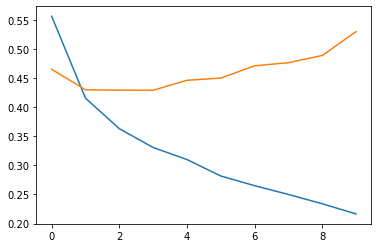

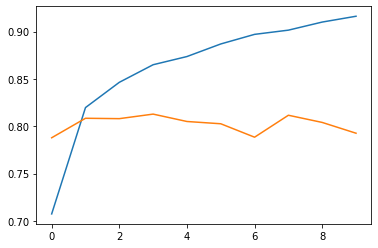

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [30]:
# 정확도 평가
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose = 0)
print(accuracy)

0.7925999760627747


# LSTM

- 2개의 출력이 순환, 그중 하나만 다음 층으로 전달
- 셀로 순화만 되는 출력 : 셀 상태(c)

In [31]:
# 텐서플로로 LSTM 순환 신경만 만들기

from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation = 'sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 lstm (LSTM)                 (None, 8)                 1312      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 모델 훈련하기

model_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

histoy = model_lstm.fit(x_train_seq, y_train, epochs = 10, batch_size = 32, validation_data = (x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 28s 41ms/step - loss: 0.4582 - accuracy: 0.7872 - val_loss: 0.3813 - val_accuracy: 0.8314
Epoch 2/10
625/625 [==============================] - 24s 39ms/step - loss: 0.3430 - accuracy: 0.8572 - val_loss: 0.3845 - val_accuracy: 0.8306
Epoch 3/10
625/625 [==============================] - 23s 37ms/step - loss: 0.3129 - accuracy: 0.8701 - val_loss: 0.3915 - val_accuracy: 0.8294
Epoch 4/10
625/625 [==============================] - 22s 36ms/step - loss: 0.2961 - accuracy: 0.8775 - val_loss: 0.3646 - val_accuracy: 0.8380
Epoch 5/10
625/625 [==============================] - 18s 28ms/step - loss: 0.2808 - accuracy: 0.8837 - val_loss: 0.3751 - val_accuracy: 0.8344
Epoch 6/10
625/625 [==============================] - 18s 28ms/step - loss: 0.2679 - accuracy: 0.8917 - val_loss: 0.3743 - val_accuracy: 0.8316
Epoch 7/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2557 - accuracy: 0.8967 - val_loss: 0.3933 - val_accuracy:

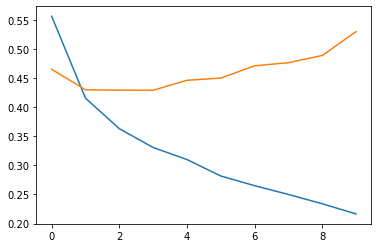

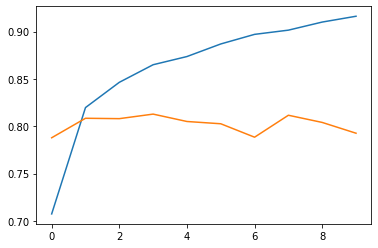

In [35]:
# 손실 그래프와 정확도 그래프 그리기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [36]:
# 검증 세츠 정확도 평가

loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose = 0)
print(accuracy)

0.8324000239372253
